In [1]:
import pandas as pd

# Cargando los datos de entrenamiento 
url = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv'
bike_data = pd.read_csv(url)
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


Los datos se compnen de las siguientes columnas:

- **instant** : un identificador de fila único
- **dteday** : la fecha en que se observaron los datos; en este caso, los datos se recopilaron diariamente; entonces hay una fila por fecha.
- **season** : un valor codificado numéricamente que indica la temporada (1:primaver, 2:verano, 3:otoño, 4:invierno)
- **yr** : El año de estudio en el que se realizó la observación (el estudio se llevó a acabo durante dos años; el año 0 representa 2011 y el año 1 representa el 2012)
- **mnth** : El mes calendario en el que seralizó la observación (1:Enero... 12:Diciembre)
- **holiday** : Un valor binario que indica si la observación se realizó o no en un día festivo
- **weekday** : El día de la semana en que se realizo la observación (0:Domingo ... 6:Sábado)
- **workingday** : un valor binario que indica si el día es o no un día laborable (no un fin de semana ni un día festivo)
- **weathersit** : Un valor categórico que indica la situación meteorológica (1:claro, 2:niebla/nubes, 3:lluvia_ligera/nieve, 4:lluvia_intensa/granizado/nieve/niebla)
- **temp**: La temperatura en Celsius (normalizada)
- **atemp** : La temperatura aparende ("sensación") en grados Celsuys (normalizada)
- **hum** : El nivel de humedad (normalizado)
- **windspeed** : La velocidad del viento(normalizada)
- **alquielres** : El número de alquileres de bicicletas registrados.

En este conjunto de datos, los **alquileres** representan la etiqueta (el valor *y*) que nuestro modelo debe entrenar para predecir. Las otras columnas son características potenciales (valores *x*).

Como se mencionó anteriormente, puede realizar ***ingeniería*** de funciones para combinar o derivar nuevas funciones. Por ejemplo, agreguemos una nueva columna llamada **día** al marco de datos extrayendo el componente de día de la columna **dteday existente**. La nueva columna representa el día del mes del 1 al 31.


In [2]:
bike_data['day']=pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


Bien, comencemos nuestro análisis de los datos examinando algunas estadísticas descroptivas clave. Podemos usar el método de **descripción** del marco de datos para generarlos para las características numéricas, así como para la columna de etiquetas de **alquileres**.


In [3]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


Las estadísticas revelan alguna información sobre la distribución de los datos en cada uno d elos campos numéricos, incluido el número de observaciones (hay 731 registros), la media, la desviación estándar, los valores mínimo y máximo  y los valores del cuartin (los valores de umbreal para 25%, 50%, que también es la mediana, y 75% d elos datos). A partir de esto, podemos ver que el número medio de alquileres diarios es de alrededor de 848; pero hay una desviación estándar comparativamente grande, lo que indica mucha variación en la cantidad de alquileres por día.

Podríamos tener una idea más clara de la distribución de los valores de los alquileres al visualizar los datos Los tipos de gráficos comunes para visualizar districuciones de datos numéricos son *histogramas* y diagramas de *caja*, así que usemos la biblioteca **matplotlib** de Python para crear uno de estos para la columna de **alquileres**.

C:\Users\HECTO\AppData\Local\Temp\ipykernel_3044\899654906.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


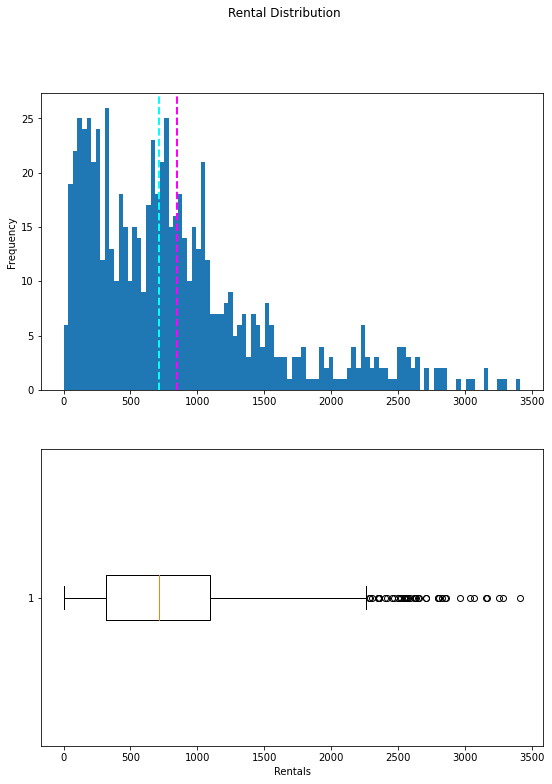

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Esto asegura que los gráficos se muestren en línea en el cuardno Jupyter
%matplotlib inline

# Obtener la columna de la etiqueta
label = bike_data['rentals']

# Crea una figura para 2 subparcelas (2 filas, 1 columna)
fig, ax = plt.subplots(2, 1, figsize =(9,12))

# Gráaficar el histograma
ax[0].hist(label, bins = 100)
ax[0].set_ylabel('Frequency')

# Agregar las lineas de la meda la mediana y la moda
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Gráficar el gráfico de caja
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Agregando el titulo a la figura
fig.suptitle('Rental Distribution')

# Muestra ls figura
fig.show()


Los gráficos muestran que el número de alquilieres diarios oscila entre 0 y poco más de 3400. Sin embargo, la cantidad media (y mediana) de alquileres diarios está más cerca del extremo inferior de ese ranto, con la mayoría de los datos entre 0 y alrededor de 2200 alquileres. Los pocos valores por encima de esto se muestran en el gráfico de caja coo pequeños círculos, lo que indica que son *valores atípicos*; en otras palabras, valores inusualmente altos o bajos más allá del rango típico de la mayoría de los datos.

Podemos hacer el mismo tipo de exploración visual de las características numérica. Vamos a crear un histograma para cada uno de estos.




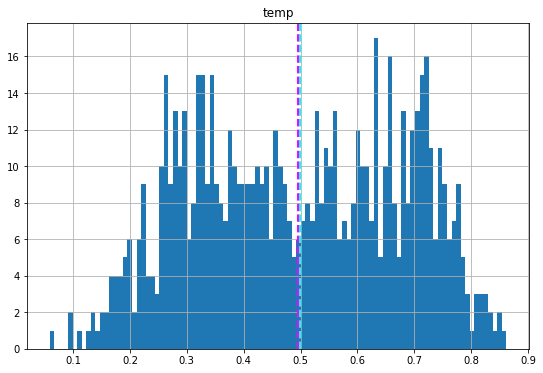

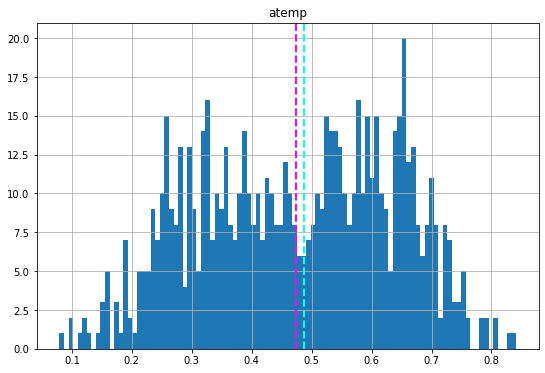

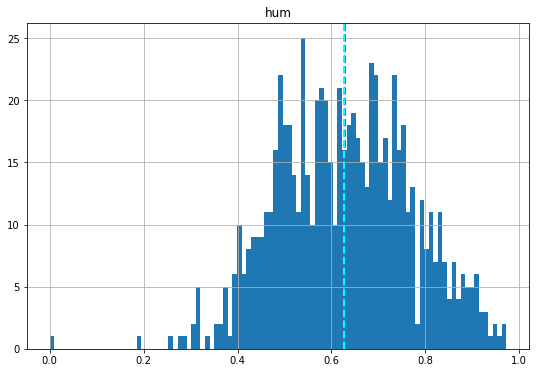

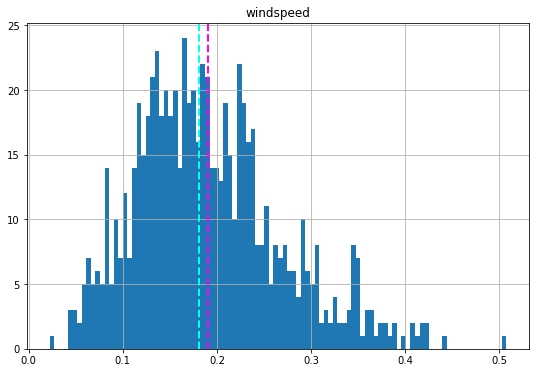

In [5]:
for col in numeric_features:
    fig =plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color ='cyan', linestyle = 'dashed', linewidth=2)
    ax.set_title(col)

    
plt.show()

Las características numéricas parecen tener una distribución más *normal*, con la media y la mediana más cerca de la mitad del rango de valores, coincidiendo con el lugar donde se encuentran los valores más comunes.
> **Nota**: Las distribuciones no son realmente *normales* en el sentido estadístico, lo que daría como resultado un histograma de "curva de campana" suave y simétrico con la media y la moda (el valor más común) en el centro; pero generalmente indican que la mayoría de las observaciones tienen un valor cercano al medio.

Hemos explorado la distribución de los valores numéricos en el conjunto de datos, pero ¿qué pasa con las características categóricas? Estos no son números continuos en una escala, por lo que no podemos usar histogramas; pero podemos trazar un gráfico de barras que muestre el recuento de cada valor discreto para cada categoría.


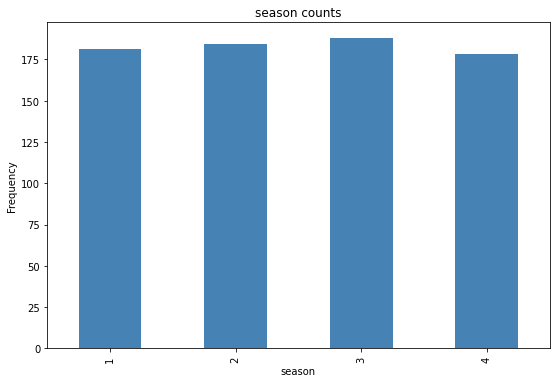

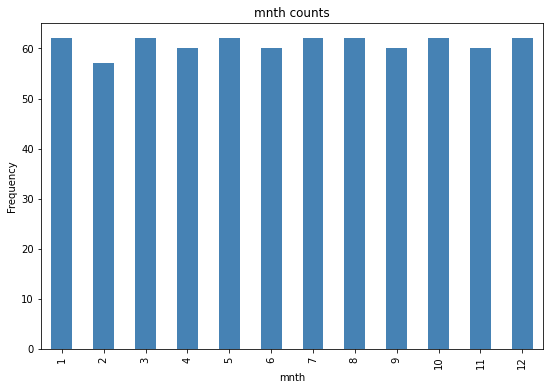

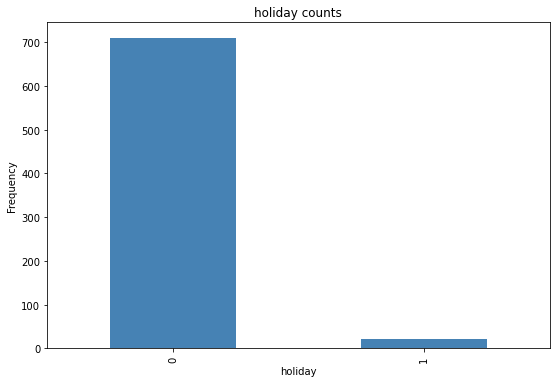

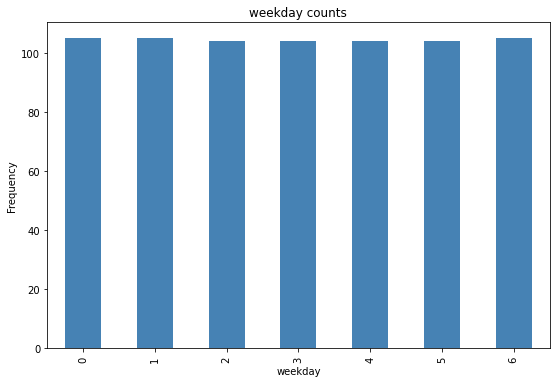

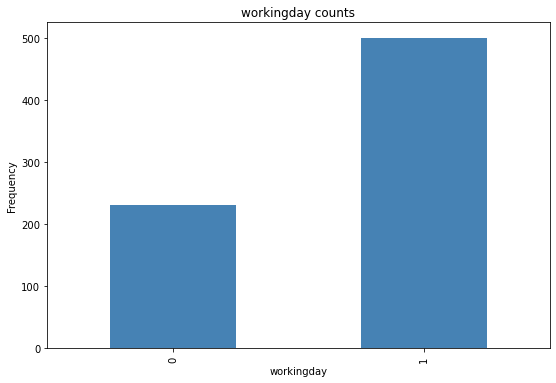

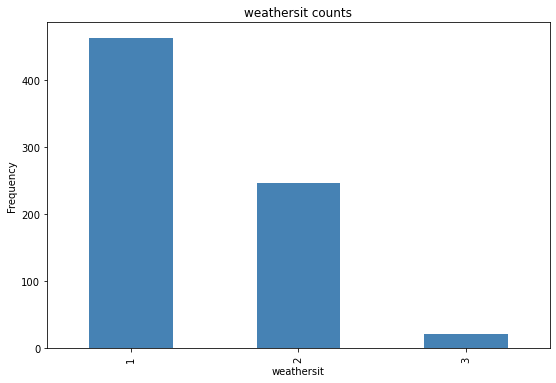

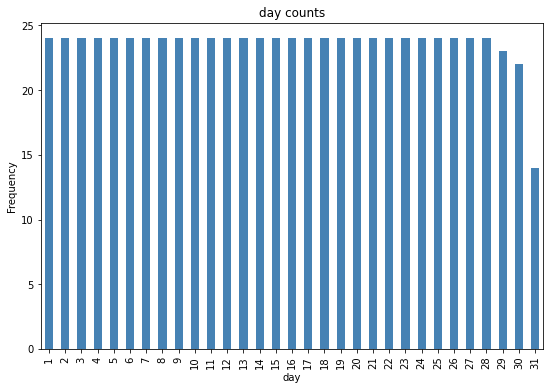

In [6]:
import numpy as np

# Trazar un gráfico de barras para cada cuenta de caracteríticas categóricas
categorical_features=['season','mnth','holiday','weekday','workingday','weathersit','day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col+' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    
plt.show()

Muchas de las caracteríticas categóricas muestran una distribución más o menos *uniforme* (lo que significa que hay aproximadamente el mismo número de filas para cada categoría). Las excepciones a esto incluyen:
- **holiday** : Hay mucho menos días que son feriados que días que no lo son.
- **workingday** :Hay más días laborables que no laborables
- **weathersit** : La mayoría de los días son de categoría 1 (claro), con la categoría 2 (niebla y nubes) la siguiente más común. Hay relativamente pocos días de categoría 3 (lluvia ligera o nieve) y ningún día de categoría 4 (lluvia intensa, granizo o niebla) en absoluto.

Ahora que sabemos algo sobre la distribución de los datos en nuestras columnas podemos comenzar a buscar relaciones entre las caracteríticas y las etiquetas de **alquileres** que queremos poder predecir.

Para las funciones numéricas, podemos crear diagramas de dispersión que meustren la intersección de los valores de funciones y las etiquetas. También podemos calcular la estadítica de *correlación* para cuantificar la relación aparente.

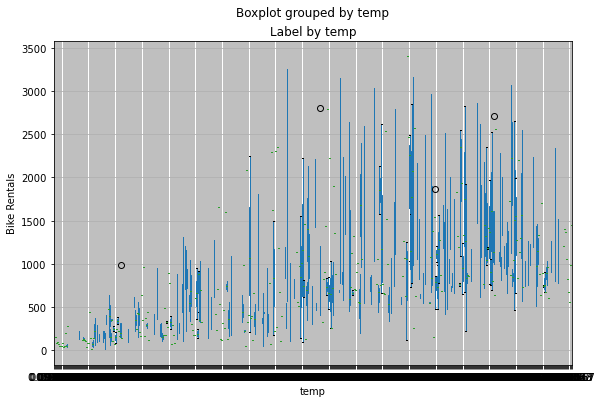

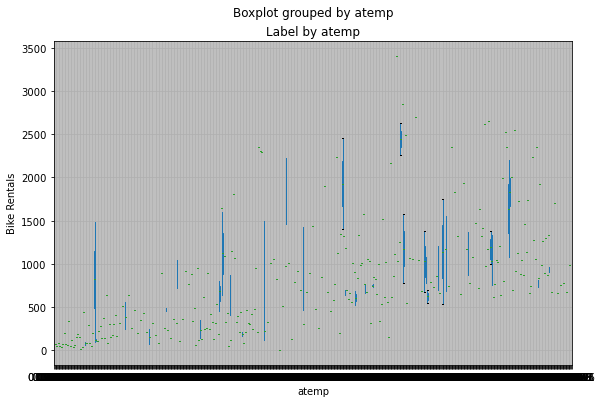

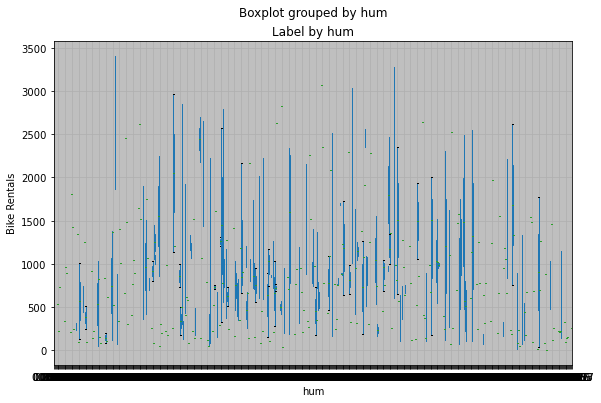

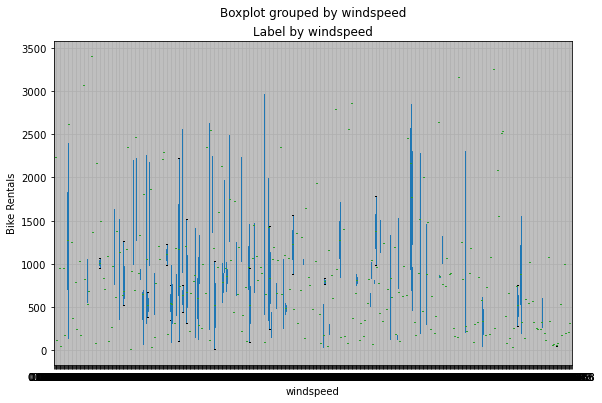

In [7]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by '+col)
    ax.set_ylabel("Bike Rentals")
    
plt.show()

Los gráficos muestran cierta variación en la relación entre algunos valores de categoría y los alquileres. Por ejemplo, hay una clara diferencia en la distribución de los alquileres en fin de semana ( **día laborable** 0 o 6) y los de la semana laboral ( **día laborable** 1 a 5). Del mismo modo, existen diferencias notables para las categorías de días **festivos** y **laborables**. Hay una tendencia notable que muestra diferentes distribuciones de alqiuler en los meses de verano y otoño en comparación con los meses de primavera e invierno. La categoría **weathersit** también parece marcar la diferencia en la distribución de alquileres. La función de **día** que creamos para el día del mes muestra poca variación, lo que indica que probablemente no predice la cantidad de alquileres.

## Entrenar un modelo de regresión

Ahora que hemos explorado los datos, es hora de usarlos para entrenar un modelo de regresión que use las funciones que hemos identificado como potencialmente predictivas para predecir la etiqueta de **alquileres**. Lo primero que debemos hacer es separar las características que queremos usar para entrenar el modelo de la etiqueta que queremos que prediga.


In [8]:
# Características y etiquetas separadas
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

Después de separar el conjunto de datos, ahora tenemos matrices numpy llamadas **X** que contienen las características **e** y que contienen las etiquetas.

Podríamos *entrenar* un modelo usando todos los datos; pero es una práctica común en el aprendizaje supervisado dividir los datos en dos subconjuntos; un conjunto (normalmente más grande) con el que entrenar el modelo y un conjunto de "retención" más pequeño con el que validar el modelo cuando se usa con el conjunto de datos de validación al comparar las etiquetas predichas con las etiquetas conocidas. Es importante dividir los datos *aleatoriamente* (en lugar de, por ejemplo, tomar el primer 70% de los datos para el entrenamiento y conservar el resto para validación). Esto ayuda a garantizar que los dos subconjuntos de datos sean estadísticamente comparables (por lo que validamos el modelo con datos que tienen una distribución estadística similar a los datos en los que se estrenó).

Para dividir aleatoriamente los datos, usaremos la función **train_test_split en la biblioteca scikit-learn**. Esta biblioteca es uno de los paquetes de aprendizaje automático más utilizados para Python.

In [10]:
from sklearn.model_selection import train_test_split

# Dividr datos 70%-30% en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Training Set: %d rows\nTest Set: %d rows'%(X_train.shape[0], X_test.shape[0]))


Training Set: 511 rows
Test Set: 220 rows


Ahora tenemos los siquientes cuatro conjuntos de datos:
- **X_train** : los valores de características que usaremos para entrenar el modelo
- **y_train** : las etiquetas correspondientes que usaremos para entrenar el modelo
- **X_test** : los valores de características que usaremeos para validar el modelo
- **y_test** : las etiquetas correspondientes que usaremos para validar el modelo

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de regresión adecuado a los datos de entrenamiento. Usaremos un algoritmo de *regresión lineal*, un punto de partida común para la regresión que funciona tratando de encontrar una ralación lineal entre los valores *X* y la etiqueta *y*. el modleo resultante es una función que define conceptualemente una línea donde se cruzan todas las combinaciones posibles de valores **X** e **Y**.

En Scikit-Learn, los algoritmos de entrenamiento están encapsulados en *estimadores* y, en este caso, usaremos el estimador **LinearRegression** para entrenar un modelo de regresión lineal.

In [11]:
# Entrenar el modelo 
from sklearn.linear_model import LinearRegression

# Ajuste un modelo de regresión lineal en el conjunto de entrenamiento
model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


## Evaluar el modelo entrenado

Ahora que hemos entrenado el modelo, podemos usarlo para predecir los recuentos de alquiler de las funciones que retuvimos en nuestro conjunto de datos de validación. Luego, podamos comparar estas predicciones con los valores reales de las etiquetas para evaluar qué tan bien (¡o no!) está funcionando el modelo.

In [12]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Etiquetas pronosticadas: ', np.round(predictions)[:10])
print('Etiquetas reales: ', y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels:  [2418  754  222   47  244  145  240  555 3252   38]


Comparar cada predicción con su correspondiente valor real de "verdad fundamental" no es una forma muy eficiente de determinar qué tan bien está prediciendo el modelo. Veamos si podemos obtener una mejor indicación visualizando un diagrama de dispersión que compare las predicciones ocn las etiquetas reales. También superpondremos una lína de tendencia para tener una idea general de qué tan bien se alinean las etiquetas pronosticasdas con las etiquetas verdaderas.

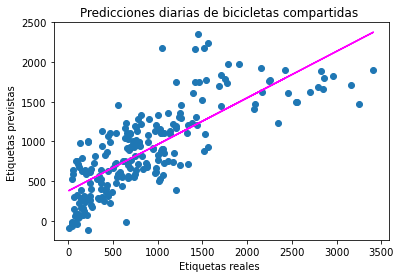

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas reales ')
plt.ylabel('Etiquetas previstas ')
plt.title('Predicciones diarias de bicicletas compartidas ')
# superponer la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Hay una tendencia diagonal difinida, y las interseccdiones de los valores pronosticados y reales generalmente siguen la ruta de la línea de tendencia; pero hay una gran diferencia entre la función ideal representada por la línea y los resultados. Esta varianza representa los *residuos* del modelo; en otras palabras, la diferencia entre la etiqueta predicha cuando el modelo aplica los coeficientes que aprendió duarante el entrenamiento a los datos de validación y el valor real de la etiqueta de validación. Estos residuos, cuando se evalúan a partir de los datos de validación, indican el nivel esperado de *error* cuando el modelo se usa con datos nuevos para los que se desconoce la etiqueta.

Puede cuantificar los residuos calculando una serie de métricas de evaluación de uso común. Nos centraremos en los tres siguientes:

- **Error cuadrático medico (MSE)** : la media de las diferencias cuadráticas entre los valores predichos y reales. Esto produce un métrica relativa en la que cuanto menor sea el valor, mejor será el ajuste del modelo.
- **Error cuadrático medio de la raíz (RMSE)** : la raíz cuadrada del MSE. Esto produce una métrica absoluta en la misma unidad que la etiqueta (en este caso, el número de alquileres). Cuando menor sea el valor, mejor será el modelo (en un sentido simple, ¡representa el número promedio de alquieleres en los que las predicciones con incorrectas!)
- **Coeficiente de determinación (generalmente conocido como *R-cuadrado* o R2)** : una métrica relativa en la que cuanto mayor sea el valor, mejor será el ajuste del modelo. En esencia, esta métrica representa la cantidad de variación entre los valores de etiqueta predichos y reales que el modelo puede explicar. 

> **Nota** : puede obtener más información sobre estas y otras métricas para evaluar modelos de regresión en la nota  [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

Usemos Scikit-Learn para calcular estas métricas para nuestro modelo, según las predicciones que generó para los datos de validación. 

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

r2 = r2_score(y_test, predictions)
print("R2: ", r2)

MSE:  201972.55947035595
RMSE:  449.4135728595165
R2:  0.604045473691919


Así que ahora hemos cuantificado la capacidad de nuestro modelo para predecir el número de alquileres. Definitivamente tiene *algún* poder predictivo, ¡pero probablemente podamos hacerlo mejor!

## Resumen

Aquí hemos explorado nuestro datos y ajustamos un modelo regresión básico. En el próximo cuaderno, probaremos una serie de otros algoritmos de regresión para mejorar el rendimiento.

## Otras lecturas

Para obtener más información sobre Scikit-Learn, consulte la [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).